# 02 — KPI Analysis

Compute and visualize all business KPIs from the warehouse outputs generated by the pipeline.

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (14, 5)

# Load warehouse KPI outputs
wh = "../data/warehouse"
daily_rev = pd.read_csv(f"{wh}/daily_revenue.csv", parse_dates=["order_date"])
weekly_rev = pd.read_csv(f"{wh}/weekly_revenue.csv")
monthly_rev = pd.read_csv(f"{wh}/monthly_revenue.csv")
aov = pd.read_csv(f"{wh}/average_order_value.csv")
orders_day = pd.read_csv(f"{wh}/orders_per_day.csv", parse_dates=["order_date"])
rev_hour = pd.read_csv(f"{wh}/revenue_per_hour.csv")
peak = pd.read_csv(f"{wh}/peak_hours.csv")
wk_vs_we = pd.read_csv(f"{wh}/weekday_vs_weekend.csv")
top_items = pd.read_csv(f"{wh}/top_menu_items.csv")
rev_cat = pd.read_csv(f"{wh}/revenue_by_category.csv")

print(f"Average Order Value: ₹{aov['average_order_value'].iloc[0]:,.2f}")

Average Order Value: ₹214.87


## Daily Revenue Trend

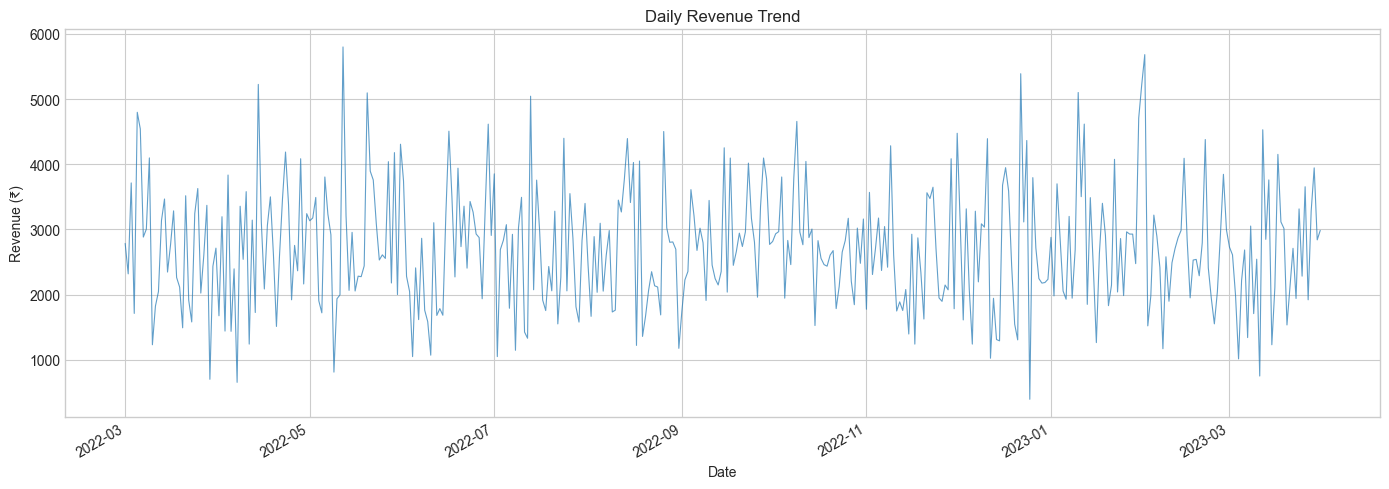

In [2]:
fig, ax = plt.subplots()
ax.plot(daily_rev["order_date"], daily_rev["total_revenue"], linewidth=0.8, alpha=0.7)
ax.set_title("Daily Revenue Trend")
ax.set_xlabel("Date")
ax.set_ylabel("Revenue (₹)")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

## Monthly Revenue

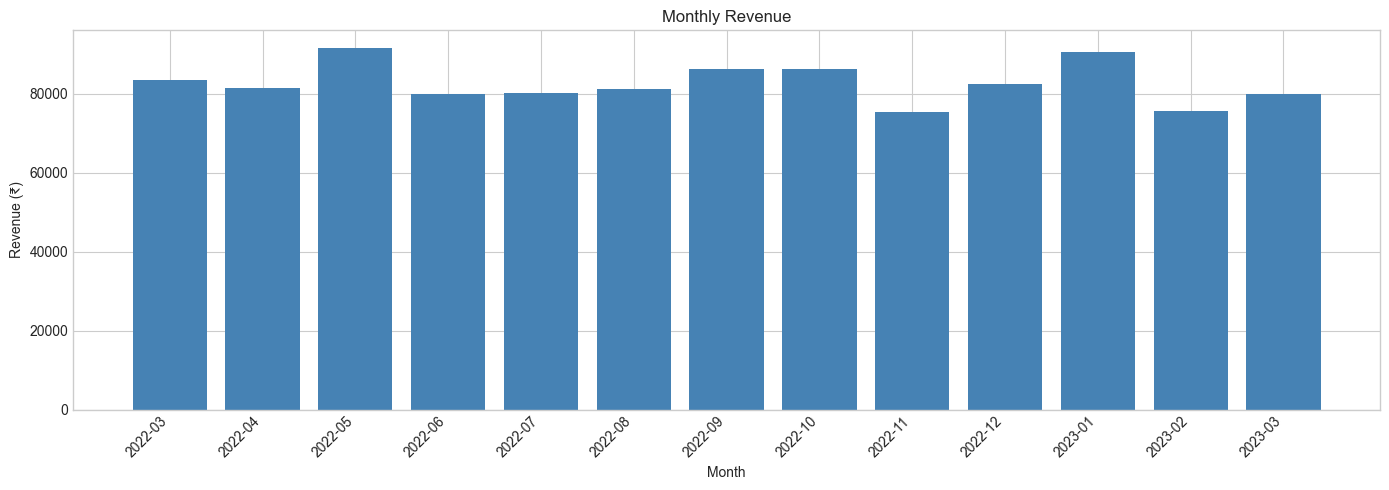

In [3]:
fig, ax = plt.subplots()
ax.bar(monthly_rev["year_month"], monthly_rev["total_revenue"], color="steelblue")
ax.set_title("Monthly Revenue")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue (₹)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Revenue per Hour (Peak Hours)

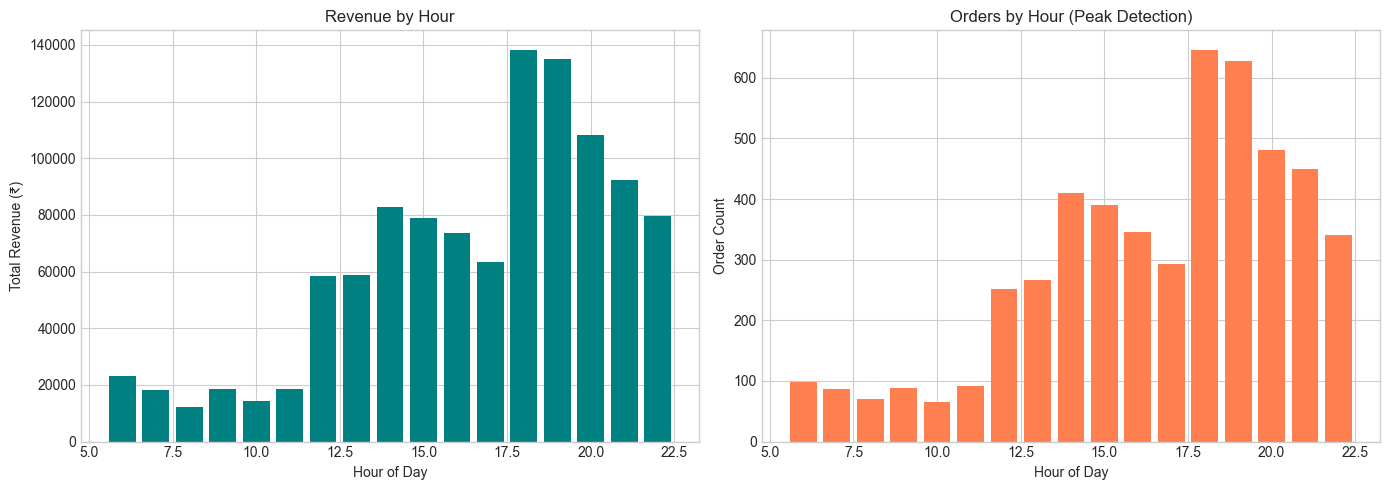

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(rev_hour["hour"], rev_hour["total_revenue"], color="teal")
ax1.set_title("Revenue by Hour")
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Total Revenue (₹)")

peak_sorted = peak.sort_values("hour")
ax2.bar(peak_sorted["hour"], peak_sorted["orders_count"], color="coral")
ax2.set_title("Orders by Hour (Peak Detection)")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Order Count")

plt.tight_layout()
plt.show()

## Weekday vs Weekend

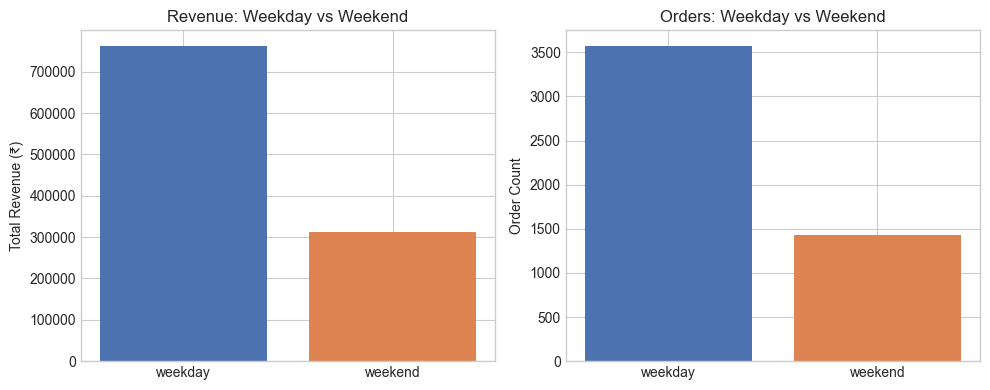

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.bar(wk_vs_we["day_type"], wk_vs_we["total_revenue"], color=["#4c72b0", "#dd8452"])
ax1.set_title("Revenue: Weekday vs Weekend")
ax1.set_ylabel("Total Revenue (₹)")

ax2.bar(wk_vs_we["day_type"], wk_vs_we["orders_count"], color=["#4c72b0", "#dd8452"])
ax2.set_title("Orders: Weekday vs Weekend")
ax2.set_ylabel("Order Count")

plt.tight_layout()
plt.show()

## Top 15 Menu Items by Revenue

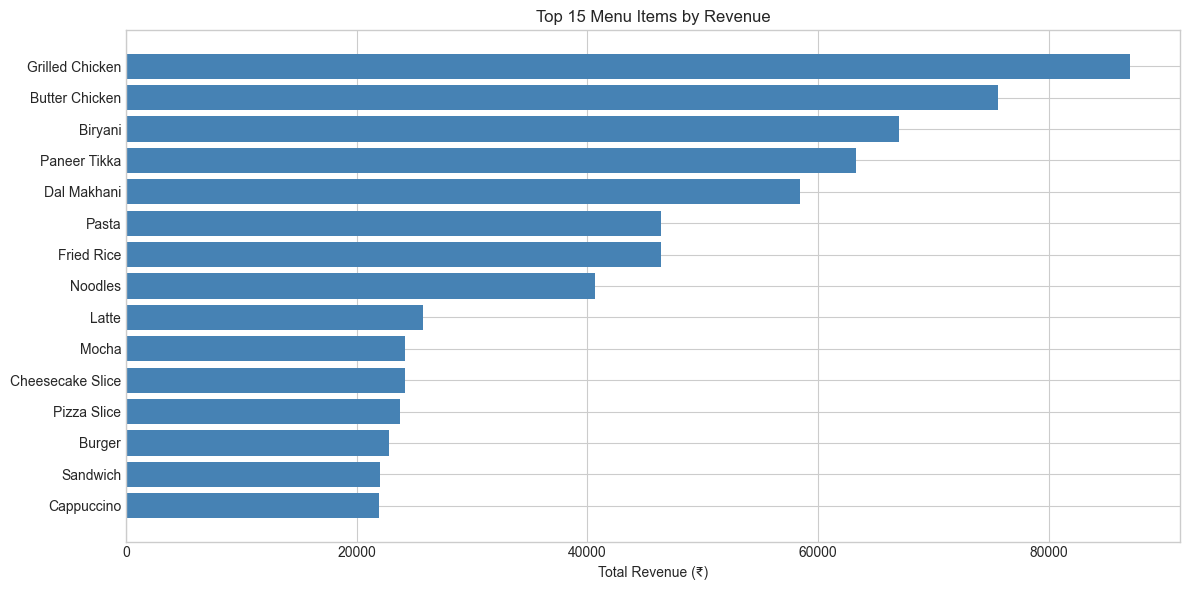

In [6]:
top15 = top_items.head(15)
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(top15["item_name"], top15["total_revenue"], color="steelblue")
ax.set_xlabel("Total Revenue (₹)")
ax.set_title("Top 15 Menu Items by Revenue")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## Revenue by Category

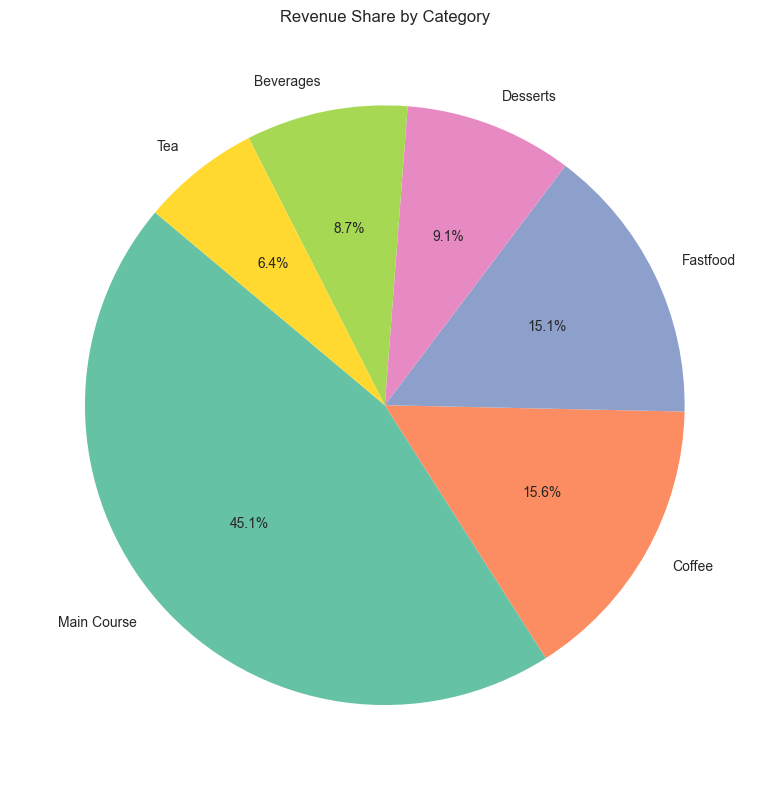

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(rev_cat["total_revenue"], labels=rev_cat["category_name"], autopct="%1.1f%%",
       startangle=140, colors=plt.cm.Set2.colors)
ax.set_title("Revenue Share by Category")
plt.tight_layout()
plt.show()